In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
import numpy as np 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet121
#from google.colab import drive #Google colab için
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import warnings
warnings.filterwarnings('always')

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [3]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.0,-0.2))
])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
BATCH_SIZE = 20
IMG_SIZE = (512, 512)
IMG_SHAPE = IMG_SIZE + (3,)

pretrained_model = DenseNet121(
 weights='imagenet',
 include_top=False ,
 input_shape=IMG_SHAPE
 )

pretrained_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)
inputs = tf.keras.Input(shape=(512, 512, 3))
x = data_augmentation(inputs)
x = pretrained_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=512,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
29089792/29084464 [==============================] - 7s 0us/step


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 512, 512, 3)       0         
_________________________________________________________________
densenet121 (Functional)     (None, 16, 16, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0     

In [6]:
train_normal_dir=os.path.join('./data/train/normal')
train_PNEUMONIA_dir=os.path.join('./data/train/anormal')
test_normal_dir=os.path.join('./data/test/normal')
test_PNEUMONIA_dir=os.path.join('./data/test/anormal')
val_normal_dir=os.path.join('./data/val/normal')
val_PNEUMONIA_dir=os.path.join('./data/val/anormal')

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


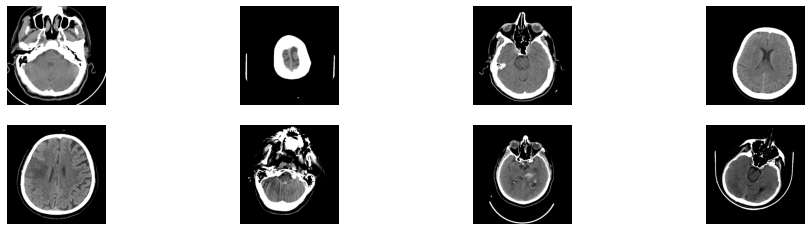

In [7]:
nrows=2
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*2)

pic_index+=4

next_normal_pix = [os.path.join(train_normal_dir,fname) for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
next_pne_pix = [os.path.join(train_PNEUMONIA_dir,fname) for fname in os.listdir(train_PNEUMONIA_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pne_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [51]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator=train_datagen.flow_from_directory(
      './data/train/',
      target_size=(512,512),
      batch_size=32,
      class_mode='binary'
)
train_dataset = image_dataset_from_directory('./data/train/',
                                             shuffle=True,
                                             batch_size=20,
                                             image_size=(512,512))


test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
      './data/test/',
      target_size=(512,512),
      batch_size=32,
      class_mode='binary',
      shuffle=True
)
test_dataset = image_dataset_from_directory('./data/test/',
                                             shuffle=False,
                                             batch_size=32,
                                             image_size=(512,512))

val_datagen=ImageDataGenerator(rescale=1./255)
val_generator=train_datagen.flow_from_directory(
      './data/val/',
      target_size=(512,512),
      batch_size=4,
      class_mode='binary'
)
validation_dataset = image_dataset_from_directory('./data/test/',
                                                  shuffle=True,
                                                  batch_size=20,
                                                  image_size=(512,512))


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Found 6356 images belonging to 2 classes.
Found 6356 files belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 140 files belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 140 files belonging to 2 classes.


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


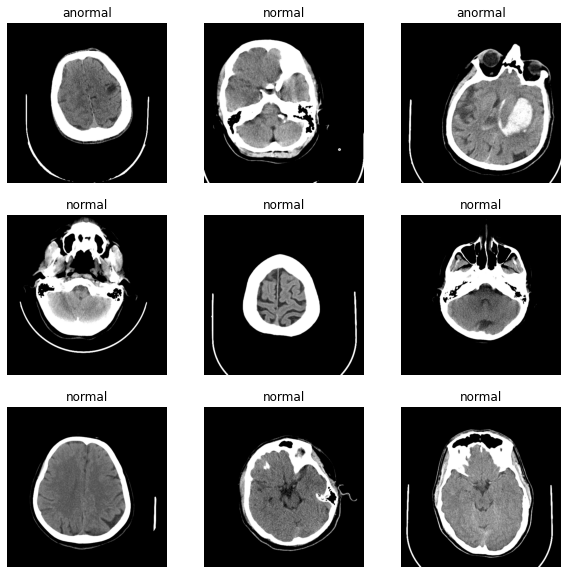

In [9]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


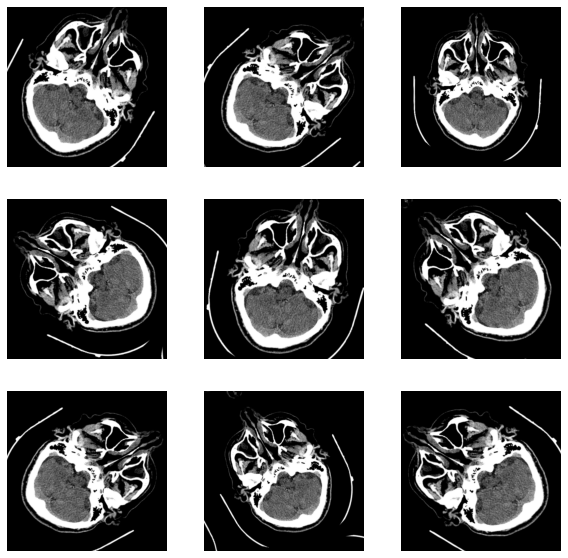

In [11]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


In [12]:
BATCH_SIZE = 20
IMG_SIZE = (512, 512)
IMG_SHAPE = IMG_SIZE + (3,)
print(IMG_SHAPE)

(512, 512, 3)
c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [19]:
es = tf.keras.callbacks.EarlyStopping(patience=5)
chkpt = tf.keras.callbacks.ModelCheckpoint(filepath='.\\models\\best_model_todate.h5', save_best_only=True, save_weights_only=True)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                 callbacks=[es,chkpt])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Epoch 1/10
318/318 [==============================] - 108s 339ms/step - loss: 0.7156 - accuracy: 0.6378 - val_loss: 0.5961 - val_accuracy: 0.6714
Epoch 2/10
318/318 [==============================] - 112s 353ms/step - loss: 0.6502 - accuracy: 0.6562 - val_loss: 0.6389 - val_accuracy: 0.6857
Epoch 3/10
318/318 [==============================] - 112s 351ms/step - loss: 0.6119 - accuracy: 0.6602 - val_loss: 0.6075 - val_accuracy: 0.6286
Epoch 4/10
318/318 [==============================] - 112s 350ms/step - loss: 0.5905 - accuracy: 0.6707 - val_loss: 0.5947 - val_accuracy: 0.6357
Epoch 5/10
318/318 [=====

In [22]:
loss0, accuracy0 = model.evaluate(test_dataset)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
7/7 [==============================] - 3s 295ms/step - loss: 0.6143 - accuracy: 0.6429


In [23]:
pretrained_model.trainable = True
fine_tune_at = 200
for layer in pretrained_model.layers[:fine_tune_at]:
 layer.trainable = False

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [26]:
history_fine = model.fit(train_dataset,
                        epochs=20,
                        initial_epoch=history.epoch[-1],
                        validation_data=validation_dataset,
                        callbacks = [chkpt,es])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Epoch 9/20
318/318 [==============================] - 203s 580ms/step - loss: 0.5352 - accuracy: 0.7041 - val_loss: 0.6027 - val_accuracy: 0.6714
Epoch 10/20
318/318 [==============================] - 186s 584ms/step - loss: 0.4377 - accuracy: 0.7812 - val_loss: 0.4465 - val_accuracy: 0.8143
Epoch 11/20
318/318 [==============================] - 187s 587ms/step - loss: 0.3417 - accuracy: 0.8540 - val_loss: 0.3869 - val_accuracy: 0.8357
Epoch 12/20
318/318 [==============================] - 184s 578ms/step - loss: 0.3052 - accuracy: 0.8699 - val_loss: 0.3900 - val_accuracy: 0.8571
Epoch 13/20
318/318 [=

In [121]:
loss0, accuracy0 = model.evaluate(test_dataset)
model_pred = model.predict(test_generator, verbose=1)


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
5/5 [==============================] - 2s 457ms/step


In [132]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

test_data = test_dataset.take(5)
score = 0
photo_amount = 0
for photo in test_data:
    pred_list = model.predict(photo[0])
    for i, pred in enumerate(pred_list):
        photo_amount += 1
        pred = np.round(sigmoid(pred))
        label = photo[1][i]
        if pred == label:
            score += 1
print(score)
print(photo_amount)
print(score/photo_amount)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
123
140
0.8785714285714286


In [29]:
y_true = test_generator.classes
y_test_probabilities = model.predict(test_generator,  verbose=1)
y_pred = np.round(y_test_probabilities)
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
18/18 [==============================] - 9s 231ms/step
              precision    recall  f1-score   support

         0.0       0.67      0.03      0.05        70
         1.0       0.39      0.34      0.36        70
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.19       140
   macro avg       0.26      0.09      0.10       140
weighted avg       0.53      0.19      0.21       140

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: Un

In [31]:
model.save('./models/teknofestdensenet.h5')

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
import cv2
img = cv2.imread('../Deneme1/data/archive/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

img = cv2.resize(img, (224,224))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)/255.
img=np.expand_dims( img,axis=0 )

preds = model.predict(img)
y_classes = np.round(preds)
print(y_classes)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-4g0fenxj\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
